In [1]:
#运行所有单元直到运行到最后一单元时打开http://127.0.0.1:8050/ 然后等待一会直到显示出所有数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud
import jieba
import re
import json
import random

In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State
import plotly.graph_objs as go 
import plotly.express as px

['http://113.117.67.132:5412', 'http://114.238.54.89:766', 'http://114.227.162.133:3617', 'http://58.255.198.145:36410', 'http://61.191.85.57:766', 'http://125.126.110.90:894', 'http://220.175.214.153:766', 'http://60.189.202.66:5412', 'http://124.112.171.111:3617', 'http://36.56.102.2:894', 'http://60.174.190.13:766', 'http://115.202.201.134:894', 'http://183.94.210.201:3617', 'http://36.56.103.246:766', 'http://114.100.1.210:766', 'http://220.179.211.219:23564', 'http://49.87.140.153:3617', 'http://114.100.3.123:36410', 'http://60.174.190.209:894', 'http://183.92.74.109:5412']


In [4]:
# client=pymongo.MongoClient()
# db=client["zhihu3"]
# collection_users=db["users"]

df_user1=pd.DataFrame(pd.read_csv("users.csv"))

In [5]:
df_user1

,_id,name,info,followers,like
0,60a72e0d8c2a661d16fd7b3b,赛勃朋克2077,学习曹丰泽精神：中国青年人扎实肯干、吃苦耐劳的非洲精神,68257,290392.0
1,60a72e0e8c2a661d16fd7b3f,谷歌开发者,NaN,85484,NaN
2,60a72e0e8c2a661d16fd7b41,王太虚,国家一级退堂鼓表演艺术家,18970,NaN
3,60a72e0e8c2a661d16fd7b42,迟先生,这个人很菜，什么也不会。,9684,10950.0
4,60a72e0e8c2a661d16fd7b43,知乎圈子,NaN,27654,NaN
...,...,...,...,...,...
724739,60a792978c2a661d161cb0b6,明夷,无,134,490.0
724740,60a792988c2a661d161cb0b9,敬往事一杯酒,不是本可以 而是来不及,50,60.0
724741,60a792988c2a661d161cb0d3,黑猫和白猫,NaN,104,392.0
724742,60a792988c2a661d161cb0d5,陈建宏,Indescribable,10,18.0


In [6]:
df_user2=df_user1.drop_duplicates(subset=["name","info"],keep="first").apply(pd.to_numeric,errors="ignore")

In [7]:
dfFoLi=df_user2[~np.isnan(df_user2.like)]

In [8]:
dfFoLi.sort_values(by="like",ascending=False).head()

,_id,name,info,followers,like
283,60a72e208c2a661d16fd8430,杨超越黑粉头子站,伪装成粉丝的黑粉还是伪装成黑粉的粉丝？,102522,2068125.0
1486,60a72e6c8c2a661d16fdac65,杜嘟嘟,公众号：杜嘟嘟嘴很毒。守护好人的爱情，是我的目标。,197234,1745654.0
197,60a72e1a8c2a661d16fd80e8,花猫哥哥,微信公众号《猫哥的视界》《猫哥的世界》,251722,1428587.0
2446,60a72ea58c2a661d16fdc917,山山笔记,公众号：山山笔记，专注你的励志/成长,181475,1029522.0
3165,60a72ecd8c2a661d16fddb4d,疯死沃,NaN,84383,870144.0


In [9]:
max_fo=max(dfFoLi.followers)
max_li=max(dfFoLi.like)

In [10]:
listBins = [0, 10, 100, 1000, 10000, 100000, 1000337]
listLabels = ['0_10','10_100','100_1000','1000_10000','10000_100000','100000以上']

In [11]:
# dfFoLi_show=dfFoLi[(dfFoLi.like>max_li/150) & ( dfFoLi.like<max_li/100)]
dfFoLi_show=dfFoLi.iloc[:,[3,4]]

In [12]:
dfFoLi_show

,followers,like
0,68257,290392.0
3,9684,10950.0
7,543,2264.0
8,3060,3759.0
9,9521,7818.0
...,...,...
724739,134,490.0
724740,50,60.0
724741,104,392.0
724742,10,18.0


In [13]:
dfFoLi_show.loc[:,"followers_range"]=pd.cut(dfFoLi_show['followers'], bins=listBins, labels=listLabels, include_lowest=True)

C:\Users\xzy12\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\xzy12\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [14]:
dfFoLi_show=dfFoLi_show.groupby(by="followers_range").aggregate({"like":"mean","followers":"size"})

In [15]:
dfFoLi_show=dfFoLi_show.rename(columns={"followers":"num"})

C:\Users\xzy12\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\xzy12\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\xzy12\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\xzy12\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\xzy12\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0, f

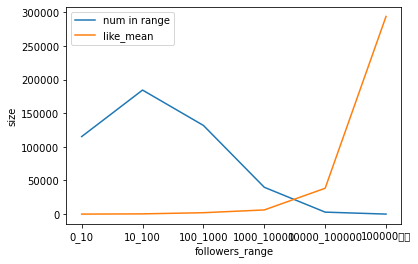

In [16]:
fig,ax=plt.subplots()
ax.plot(dfFoLi_show.index,dfFoLi_show.num,label="num in range")
ax.plot(dfFoLi_show.index,dfFoLi_show.like,label="like_mean")
ax.set_xlabel("followers_range")
ax.set_ylabel("size")
ax.legend()

In [17]:
df_topics=pd.DataFrame(pd.read_csv(filepath_or_buffer="D:\python\\testWEBPAGE\\topics.csv",encoding="gb18030"))

In [18]:
def change(text):
    return re.sub(',','',str(text))

In [19]:
df_topics['followers']=df_topics['followers'].apply(change)
df_topics['qnum']=df_topics['qnum'].apply(change)

In [20]:
df_topics=df_topics.drop_duplicates(subset=["name","title"],keep="first").apply(pd.to_numeric,errors="ignore").iloc[:,[1,2,3,4,5]]


In [21]:
df_topics['followers']=pd.to_numeric(df_topics.followers,errors='coerce').fillna(-1)
df_topics['qnum']=pd.to_numeric(df_topics.qnum,errors='coerce').fillna(-1)

In [22]:
df_topics=df_topics[(df_topics['followers']!=-1)&(df_topics['qnum']!=-1)]

In [23]:
df_user=df_user2.iloc[:,[1,2,3]]

In [24]:
df_con=df_user.merge(df_topics,how='left',on="name")

In [25]:
df_topics_rName=df_con.iloc[:,[3,4,5,6]].drop_duplicates(subset="title",keep="first")

In [26]:
df_topics_rName

,title,followers_y,qnum,des
0,PlayStation,31327.0,7183.0,NaN
1,集合啦！动物森友会,13990.0,459.0,NaN
2,怪物猎人：世界,14602.0,1798.0,NaN
3,潮汕地区,6928.0,5404.0,NaN
4,天文学,5411886.0,44173.0,NaN
...,...,...,...,...
930365,系统设计,1308.0,844.0,NaN
930415,机器人学,69.0,8.0,NaN
930486,Don McLean,56.0,36.0,NaN
930614,我是路人甲,502.0,54.0,《我是路人甲》是尔冬升执导，由一群在横店“漂”的群众演员主演的电影。该片讲述的是一群在横店当...


In [27]:
plt.rcParams['font.sans-serif'] = ['KaiTi']

In [28]:
#df_topics_rName dfFoLi

In [29]:
df_topics_rName

,title,followers_y,qnum,des
0,PlayStation,31327.0,7183.0,NaN
1,集合啦！动物森友会,13990.0,459.0,NaN
2,怪物猎人：世界,14602.0,1798.0,NaN
3,潮汕地区,6928.0,5404.0,NaN
4,天文学,5411886.0,44173.0,NaN
...,...,...,...,...
930365,系统设计,1308.0,844.0,NaN
930415,机器人学,69.0,8.0,NaN
930486,Don McLean,56.0,36.0,NaN
930614,我是路人甲,502.0,54.0,《我是路人甲》是尔冬升执导，由一群在横店“漂”的群众演员主演的电影。该片讲述的是一群在横店当...


In [30]:
df_topics_rName=df_topics_rName.rename(columns={"followers_y":"followers"})

In [31]:
df_topics_rName=df_topics_rName[~pd.isna(df_topics_rName.des)]

In [32]:
# dfFoLi['info'].apply(pd.isna)
dfFoLi=dfFoLi[~pd.isna(dfFoLi['info'])]

In [33]:
df_topics_rName[df_topics_rName['title']=="超级乐队"]

,title,followers,qnum,des


In [34]:
# def wash(li):
#     mean1 = li.quantile(q=0.25)#下四分位差
#     mean2 = li.quantile(q=0.75)#上四分位差
#     mean3 = mean2-mean1#中位差
#     topnum2 = mean2+1.5*mean3
#     bottomnum2 = mean2-1.5*mean3
#     replace_value1=li[li<topnum2].max()
#     return replace_value1,topnum2
    # replace_value2=df_user2['followers'][df_user2['followers']>bottomnum2].min()

In [35]:
# dfFoLi_wash=dfFoLi
# # print(wash(df_user['followers']))
# replace_value1,topnum2=wash(dfFoLi_wash['followers'])
# dfFoLi_wash.loc[dfFoLi_wash['followers']>topnum2,'followers']=topnum2
# df_user1.loc[df_user2['followers']<bottomnum2,'followers']=replace_value2

In [36]:
# replace_value2,topnum3=wash(dfFoLi_wash['like'])
# dfFoLi_wash.loc[dfFoLi_wash['like']>topnum3,'like']=topnum3

In [37]:
# app.run_server()

In [38]:
df_posts=pd.DataFrame(pd.read_csv(filepath_or_buffer="D:\python\\testWEBPAGE\posts.csv",encoding="gb18030"))

In [39]:
df_posts=df_posts[df_posts.content.str.len()>20].iloc[:,[1,2]]

In [40]:
len(df_posts)

9693

In [41]:
df_posts

,content,voteCount
0,2004年播出的电视剧《武当》，是由焦恩俊和李若彤两大男神女神主演。当少年张三丰（张君宝）被...,2382036
1,​​前一段时间沉迷了一段时间《只狼》​，事实上在这之前我并没有接触过宫崎英高的游戏，虽然久仰...,2114265
2,全文2800字左右，预计阅读时间5分钟 在一万多年前的北美大陆上，当最后一匹庞马倒在...,2082148
3,据悉，11月25日下午，杨超越在七度空间举办的粉丝见面会上，在才艺表演环节现场绘画，画了一张...,2068125
4,1，为什么付出太多的感情，带不来幸福美满的婚姻？ 前几天看到一条抖音视频，是一位...,1947139
...,...,...
9995,在你敲下第一个字的那一刻开始 你踌躇满志，心潮澎湃 你下定决心，鼓起勇气 你要用文字表...,10307
9996,一些可可爱爱的自动回复文案 已读 喂猪中 别催我！！！ ...,10303
9997,今天是 1月14号 。 三年前的今天，他变成了一颗星星，去了天上。 ...,10301
9998,早上中午大份酸奶水果捞 办了水果捞的卡 一个大份只要7.5 以后应该会经常点了 不过...,10299


In [42]:
def getImagePost(i):
    txt=""
    for post in df_posts.content[i]:
        for line in post:
            txt=txt+line.strip()
    words = jieba.lcut(txt)                                        #精确分词
    newtxt = ' '.join(words)                                       #空格拼接
    wordcloud = WordCloud(font_path="msyh.ttc").generate(newtxt)   #生成词云，font_path="msyh.ttc"为选择微软雅黑字体
    image = wordcloud.to_image()
    return image

In [43]:
def getPost(i):
    return df_posts.iloc[i,0]

In [44]:
show=df_user2.merge(df_topics,on='name')#内部连接才好显示
show=show[~pd.isna(show.like)]

In [45]:
show

,_id,name,info,followers_x,like,title,followers_y,qnum,des
0,60a72e0d8c2a661d16fd7b3b,赛勃朋克2077,学习曹丰泽精神：中国青年人扎实肯干、吃苦耐劳的非洲精神,68257,290392.0,PlayStation,31327.0,7183.0,NaN
1,60a72e0d8c2a661d16fd7b3b,赛勃朋克2077,学习曹丰泽精神：中国青年人扎实肯干、吃苦耐劳的非洲精神,68257,290392.0,集合啦！动物森友会,13990.0,459.0,NaN
2,60a72e0d8c2a661d16fd7b3b,赛勃朋克2077,学习曹丰泽精神：中国青年人扎实肯干、吃苦耐劳的非洲精神,68257,290392.0,怪物猎人：世界,14602.0,1798.0,NaN
3,60a72e0d8c2a661d16fd7b3b,赛勃朋克2077,学习曹丰泽精神：中国青年人扎实肯干、吃苦耐劳的非洲精神,68257,290392.0,潮汕地区,6928.0,5404.0,NaN
4,60a72e0d8c2a661d16fd7b3b,赛勃朋克2077,学习曹丰泽精神：中国青年人扎实肯干、吃苦耐劳的非洲精神,68257,290392.0,天文学,5411886.0,44173.0,NaN
...,...,...,...,...,...,...,...,...,...
311854,60a792888c2a661d161cad6d,梧桐树下,数学，金融,55,37.0,坚果手机,4915.0,1982.0,坚果手机是锤子科技推出的手机品牌，该系列于2015年8月正式发布，定位群体为年轻人，搭载 S...
311857,60a7928b8c2a661d161cae18,吃兔兔的突突兔,我要吃果冻要吃海苔要吃巧克力,554,8420.0,汽车蓄电池,498.0,856.0,NaN
311860,60a7928f8c2a661d161caed8,萧慕辰,经管类专业的现状,100,40.0,Don McLean,56.0,36.0,NaN
311861,60a792928c2a661d161caf9c,Preacher.1379,emm…,25,473.0,第10放映室,6388.0,118.0,《第10放映室》是由中央电视台科教频道（CCTV10）推出的电影文化介绍栏目，王玲玲主持，于...


In [46]:
show.loc[:,"followers_range"]=pd.cut(show['followers_x'], bins=listBins, labels=listLabels, include_lowest=True)

In [47]:
show=show.iloc[:,[1,2,3,4,5,6,7,9]]

In [48]:
show_groups=show.groupby(by="followers_range")

In [49]:
show_groups

In [50]:
show_groups_con=pd.DataFrame()

In [51]:
for name,group in show_groups:
    show_groups_con=show_groups_con.append(group.sample(n=10,replace=False))

In [52]:
result=lambda x:np.log2(10*x)

In [53]:
show_groups_con.loc[:,"like"]=list(map(result,show_groups_con["like"]))

In [54]:
show_other=show.iloc[:,[0,4]]

In [55]:
show_other=show_other.drop_duplicates(subset=["name","title"],keep="first")

In [56]:
with open('.\\social.json','r',encoding="GB18030") as f:
    social_pic=json.load(f)

In [57]:
def change2(x):
    return '是' if x else '否'

In [58]:
def get_social_ans_show():
    social_ans=dict()
    while (len(social_ans)<1000):
        s=0
        ns=np.random.choice(list(social_pic.keys()),replace=False)
        ls=social_pic[ns]
        for i in ls :
            s=s+len(social_pic[i])
        else:
            if(len(ls)!=0):
                social_ans[ns]=(s/len(ls),len(ls))
    social_ans_show=pd.DataFrame(social_ans)
    social_ans_show=pd.DataFrame(social_ans_show.T,index=social_ans_show.columns,columns=[0,1])
    social_ans_show=social_ans_show.rename(columns={0:"好友平均受欢迎度",1:"自身受欢迎度"})
    social_ans_show.loc[:,'好友是否比你受欢迎']=list(map(change2,social_ans_show['好友平均受欢迎度']>social_ans_show['自身受欢迎度']))
    social_ans_show2=social_ans_show.groupby(by='好友是否比你受欢迎').size()
    return social_ans_show,social_ans_show2

In [59]:


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.Button(
        id='submit3',
        n_clicks=0,
        children='随机取样'
    ),
    dcc.Graph(
        id='G4'
    ),
    dcc.Graph(
        id='G5'
    )
])

@app.callback(
    Output('G4','figure'),
    Output('G5','figure'),
    Input('submit3','n_clicks')
)
def update_figure2(value):
    social_ans_show,social_ans_show2=get_social_ans_show()
    fig1=px.scatter(x=social_ans_show['好友平均受欢迎度'],y=social_ans_show['自身受欢迎度'],hover_name=social_ans_show.index,color=social_ans_show['好友是否比你受欢迎'])
    fig2=px.pie(social_ans_show2,values=social_ans_show2,names=social_ans_show2.index,title='好友是否比你受欢迎')
    return fig1,fig2



In [60]:
# app.run_server()

In [61]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div([
    html.Div([
     html.H1('热门用户与主题及其相关查询',style={"text-align":"center","color":"blue"}),
    html.Div([
        dcc.Dropdown(
        id='S1'
    ),
    dcc.Dropdown(
        id='S2',
        options=[{"label":"user","value":"user"},{"label":"topics","value":"topics"}],
        value="user"
    ),
    dcc.Input(id="S3", type="number", value=10),
    ],style={'width': '48%','display':'inline-block'}),
    dcc.Graph(
        id='G1',
    ),
    html.Div([
        dcc.Input(
            id='keyword',
            type='text'
        ),
        html.Button(
            id='submit',
            n_clicks=0,
            children="user"
        )
    ]),
    html.Div(
        id='text'
    ),
    html.Div(
        id='text2'
    ),
    html.Hr(id="r1"),
      html.H1('答主中点赞数与粉丝数的关系以及人数占比',style={"text-align":"center","color":"blue"}),
        dcc.Graph(
            id='G2',
            figure=go.Figure(
                data=[go.Scatter(x=dfFoLi_show.index,y=dfFoLi_show.num,name="人数"),go.Scatter(x=dfFoLi_show.index,y=dfFoLi_show.like,name="用户点赞数")],
                layout=go.Layout(
                    xaxis=dict(title="用户粉丝数")
                )
            )
        )
    ]),
    html.Hr(id="r2"),
    html.Div([
    html.H1('文章及其词云图查询',style={"text-align":"center","color":"blue"}),
    dcc.Input(id='input-1-state', type="number", value=1,min=1,max=9650),
    html.Button(id='submit-button-state', n_clicks=0, children='Submit'),
    html.P(id="text3"),
    html.Img(id='output-state',style={"margin":"0 auto"})
]),
html.Hr(id="r3"),
html.Div([
    html.H1('用户热度与所参与话题热度的关系(多维度)',style={"text-align":"center","color":"blue"}),
    html.Button(
        id='submit2',
        n_clicks=0,
        children="生成",
        style={"margin":"0 auto"}
        
    ),
    dcc.Graph(
        id='G3',
     )
]),
html.Hr(id='r4'),
html.Div([
    html.H1('验证友谊悖论-你的朋友总是比你更受欢迎',style={"text-align":"center","color":"blue"}),
    html.Button(
        id='submit3',
        n_clicks=0,
        children='随机取样'
    ),
    dcc.Graph(
        id='G4'
    ),
    dcc.Graph(
        id='G5'
    )
])
])
@app.callback(
    Output('S1','options'),
    Output('submit','children'),
    Input('S2','value')
)
def set_options(value):
    options=[{'label':"followers",'value':"followers"},{'label':"like",'value':"like"}]
    if(value=="user"):
        options=[{'label':"followers",'value':"followers"},{'label':"like",'value':"like"}]
    if(value=="topics"):
        options=[{'label':"followers",'value':"followers"},{'label':"qnum",'value':"qnum"}]
    return options,value

@app.callback(
    Output('S1','value'),
    Input('S1','options')
)
def set_value(options):
    return options[0]['value']

@app.callback(
    Output('G1','figure'),
    Input('S1','value'),
    Input('S2','value'),
    Input('S3','value')
)
def ipdate_figure(value1,value2,value3):
    df_fig=dfFoLi
    x="name"
    xname="用户名称"
    yname="关注数"
    if(value2=="user"):
        df_fig=dfFoLi
        x="name"
        if(value1=='like'):
            yname="用户点赞数"
    if(value2=="topics"):
        df_fig=df_topics_rName
        x="title"
        xname="话题名称"
        if(value1=='qnum'):
            yname='话题提问数'
    df_fig=df_fig.sort_values(by=value1,ascending=False).head(value3)
    f=px.bar(x=df_fig[x],y=df_fig[value1],labels={'x':xname,'y':yname})
    return f
@app.callback(
    Output('text','children'),
    Output('text2','children'),
    Input('submit','n_clicks'),
    State('submit','children'),
    State('keyword','value')
)
def set_text(n_clicks,input1,input2):
    if(input1=='user'):
        if(len(df_con[df_con['name']==input2])==0):
            return "查无此人",""
        vs1=str(df_con[df_con['name']==input2].iloc[0]['info'])
        vs2="所关注话题:"+" ".join(str(s) for s in list(df_con[df_con['name']==input2].head(10)["title"].unique()))+"等"
        if(vs1=='nan'):
            vs1='无'
        if(len(list(df_con[df_con['name']==input2]))==0):
            vs2='无'
        return vs1,vs2
    if(input1=='topics'):
        if(len(df_con[df_con['title']==input2])==0):
            return "查无此话题",""
        vs1=str(df_con[df_con['title']==input2].iloc[0]['des'])
        vs2="代表用户:"+" ".join(str(s) for s in list(df_con[df_con['title']==input2].head(10)["name"].unique()))+"等"
        if(vs1=='nan'):
            vs1='无'
        if(len(list(df_con[df_con['title']==input2]))==0):
            vs2='无'
        return vs1,vs2
@app.callback(Output('output-state', 'src'),
              Output('text3','children'),
              Input('submit-button-state', 'n_clicks'),
              State('input-1-state', 'value'),
)
def update_output(n_clicks, input1):
    return getImagePost(input1-1),getPost(input1-1)

@app.callback(
    Output('G3','figure'),
    Input('submit2','n_clicks')
)
def update_grenate(value):
    show_groups_con=pd.DataFrame()
    for name,group in show_groups:
        show_groups_con=show_groups_con.append(group.sample(n=10,replace=False))
    show_groups_con.loc[:,"like"]=list(map(result,show_groups_con["like"]))
    fig=px.scatter(show_groups_con,x="followers_y",y="qnum",size="like",color="followers_range",hover_name="title",labels={
        "followers_y":"话题关注数","qnum":"话题提问数","followers_range":"用户粉丝范围","like":"用户点赞数"
    })
    return fig
@app.callback(
    Output('G4','figure'),
    Output('G5','figure'),
    Input('submit3','n_clicks')
)
def update_figure2(value):
    social_ans_show,social_ans_show2=get_social_ans_show()
    fig1=px.scatter(x=social_ans_show['好友平均受欢迎度'],y=social_ans_show['自身受欢迎度'],hover_name=social_ans_show.index,color=social_ans_show['好友是否比你受欢迎'],labels={"x":"好友受欢迎程度","y":"自身受欢迎程度"})
    fig2=px.pie(social_ans_show2,values=social_ans_show2,names=social_ans_show2.index,title='好友是否比你受欢迎')
    return fig1,fig2



In [62]:
app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2021 20:52:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 20:52:37] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 20:52:37] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 20:52:37] "POST /_dash-update-component HTTP/1.1" 200 -
Building prefix dict from the default dictionary ...
127.0.0.1 - - [22/Jun/2021 20:52:37] "POST /_dash-update-component HTTP/1.1" 200 -
Loading model from cache C:\Users\xzy12\AppData\Local\Temp\jieba.cache
127.0.0.1 - - [22/Jun/2021 20:52:37] "POST /_dash-update-component HTTP/1.1" 200 -
Loading model cost 2.347 seconds.
Prefix dict has been built successfully.
127.0.0.1 - - [22/Jun/2021 20:52:44] "POST /_dash-update-compo